[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NorisTalaban/Satellite_Object_Detection_dl/blob/main/Test_and_Error_Analysis.ipynb)

In [ ]:
!pip install ultralytics -q
!pip install -q gdown



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.7 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import yaml
import gdown
import zipfile
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
#Download dataset and model

dataset_id = "1vE5gLeLITUw6oYm6DNCJX4HJh_VbiPVt"
dataset_path = "/content/xview.zip"
dataset_url = f"https://drive.google.com/uc?id={dataset_id}"

print("Downloading xView dataset...")
gdown.download(dataset_url, dataset_path, quiet=False)

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

print("Dataset extracted to /content/xview")

model_id = "1ZtBXCtU4qTgS0nz3kO9sQ4Z4pUk8FLMR"
model_path = "/content/best_xview.pt"
model_url = f"https://drive.google.com/uc?id={model_id}"

print("Downloading trained model...")
gdown.download(model_url, model_path, quiet=False)

model_val = YOLO(model_path)
print(f"Model loaded from {model_path}")


Downloading...
From (original): https://drive.google.com/uc?id=1vE5gLeLITUw6oYm6DNCJX4HJh_VbiPVt
From (redirected): https://drive.google.com/uc?id=1vE5gLeLITUw6oYm6DNCJX4HJh_VbiPVt&confirm=t&uuid=edbe1a00-e4b7-4937-849c-60c87eebc967
To: /content/xview.zip
100%|██████████| 2.43G/2.43G [00:40<00:00, 60.6MB/s]


Dataset extracted to /content/xview


Downloading...
From: https://drive.google.com/uc?id=1ZtBXCtU4qTgS0nz3kO9sQ4Z4pUk8FLMR
To: /content/best_xview.pt
100%|██████████| 6.22M/6.22M [00:00<00:00, 66.3MB/s]


Model loaded from /content/best_xview.pt


In [ ]:
yaml_temp_path = "/content/xview_temp.yaml"
yaml_dict = {
    "path": "/content/xview",
    "train": "train",
    "val": "val",
    "test": "test",
    "nc": 60,
    "names": {
        0: "Fixed-wing Aircraft", 1: "Small Aircraft", 2: "Passenger/Cargo Plane",
        3: "Helicopter", 4: "Passenger Vehicle", 5: "Small Car",
        6: "Bus", 7: "Pickup Truck", 8: "Utility Truck",
        9: "Truck", 10: "Cargo Truck", 11: "Truck Tractor w/ Box Trailer",
        12: "Truck Tractor", 13: "Trailer", 14: "Truck Tractor w/ Flatbed Trailer",
        15: "Truck Tractor w/ Liquid Tank", 16: "Crane Truck", 17: "Railway Vehicle",
        18: "Passenger Car", 19: "Cargo/Container Car", 20: "Flat Car",
        21: "Tank car", 22: "Locomotive", 23: "Maritime Vessel",
        24: "Motorboat", 25: "Sailboat", 26: "Tugboat",
        27: "Barge", 28: "Fishing Vessel", 29: "Ferry",
        30: "Yacht", 31: "Container Ship", 32: "Oil Tanker",
        33: "Engineering Vehicle", 34: "Tower crane", 35: "Container Crane",
        36: "Reach Stacker", 37: "Straddle Carrier", 38: "Mobile Crane",
        39: "Dump Truck", 40: "Haul Truck", 41: "Scraper/Tractor",
        42: "Front loader/Bulldozer", 43: "Excavator", 44: "Cement Mixer",
        45: "Ground Grader", 46: "Hut/Tent", 47: "Shed",
        48: "Building", 49: "Aircraft Hangar", 50: "Damaged Building",
        51: "Facility", 52: "Construction Site", 53: "Vehicle Lot",
        54: "Helipad", 55: "Storage Tank", 56: "Shipping container lot",
        57: "Shipping Container", 58: "Pylon", 59: "Tower"
    }
}

# save temporary yaml
with open(yaml_temp_path, "w") as f:
    yaml.dump(yaml_dict, f, sort_keys=False)

print("Temporary YAML created:", yaml_temp_path)


Temporary YAML created: /content/xview_temp.yaml



image 1/2480 /content/xview/test/img_100_1280_1280.jpg: 640x640 (no detections), 7.6ms
image 2/2480 /content/xview/test/img_100_1920_1920.jpg: 640x640 (no detections), 12.0ms
image 3/2480 /content/xview/test/img_100_2560_2560.jpg: 640x640 (no detections), 7.4ms
image 4/2480 /content/xview/test/img_100_640_0.jpg: 640x640 2 Small Cars, 10 Buildings, 7.5ms
image 5/2480 /content/xview/test/img_102_1280_1920.jpg: 640x640 7 Small Cars, 104 Buildings, 7.5ms
image 6/2480 /content/xview/test/img_102_1920_0.jpg: 640x640 44 Small Cars, 136 Buildings, 9.6ms
image 7/2480 /content/xview/test/img_102_1920_2560.jpg: 640x640 11 Small Cars, 86 Buildings, 8.9ms
image 8/2480 /content/xview/test/img_102_2560_0.jpg: 640x640 (no detections), 8.1ms
image 9/2480 /content/xview/test/img_102_2560_1280.jpg: 640x640 (no detections), 7.9ms
image 10/2480 /content/xview/test/img_102_640_640.jpg: 640x640 8 Small Cars, 29 Buildings, 7.5ms
image 11/2480 /content/xview/test/img_1036_0_1280.jpg: 640x640 1 Small Car, 1 Bu

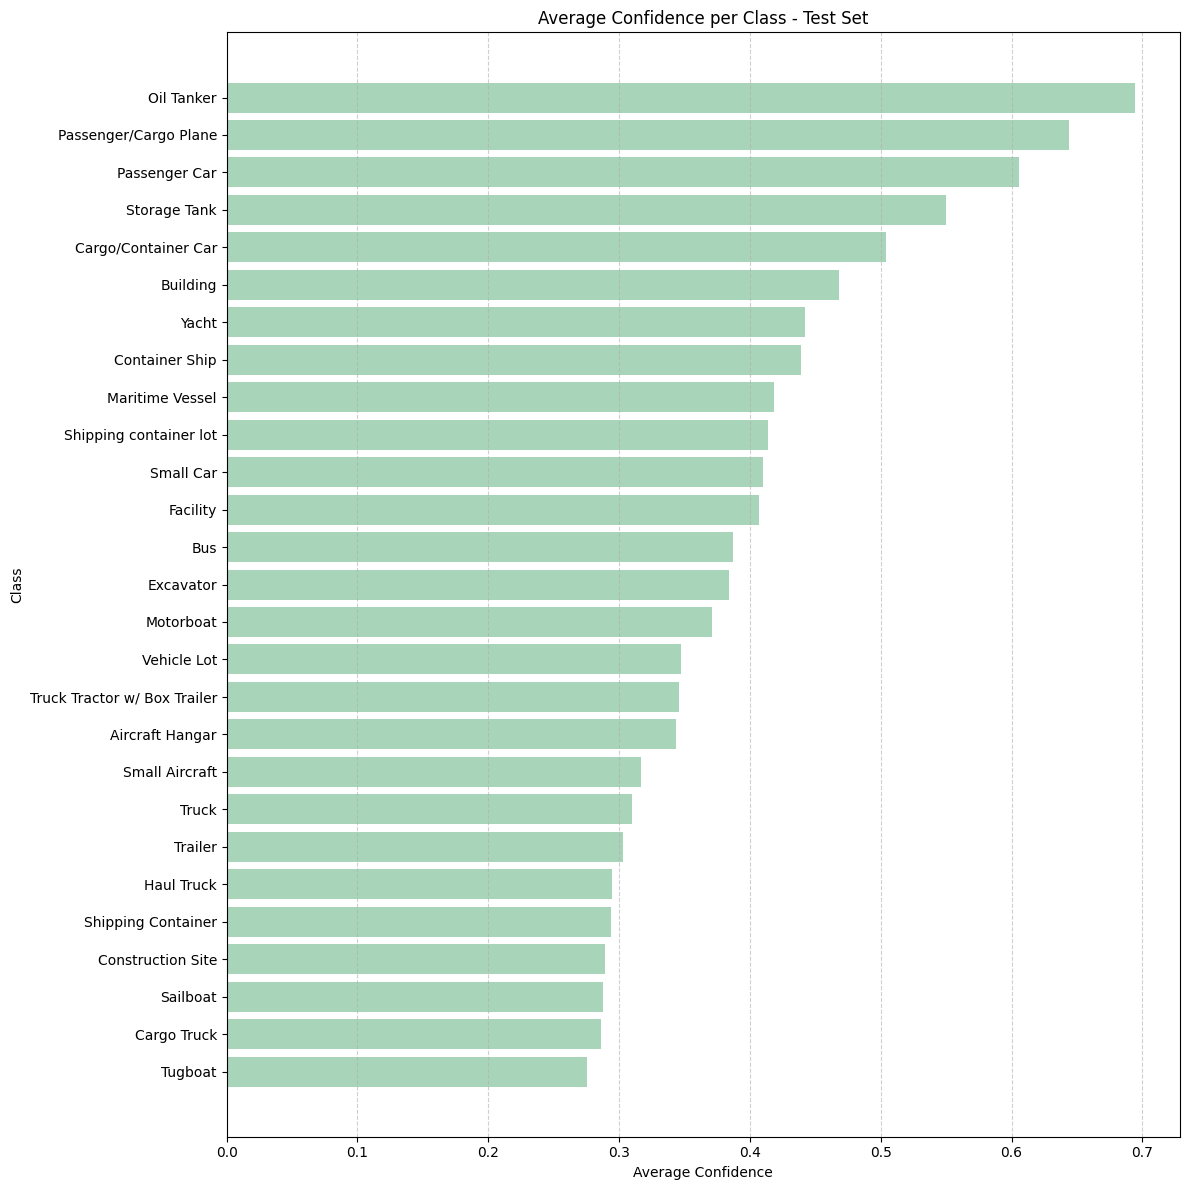

In [ ]:
# Inference on test set and average confidence per class
conf_data = []

for r in model_val.predict(source=yaml_dict["path"] + "/test", imgsz=640, conf=0.25, stream=True):
    for conf, cls in zip(r.boxes.conf, r.boxes.cls):
        conf_data.append({"class": int(cls), "confidence": float(conf)})

conf_df = pd.DataFrame(conf_data)
avg_conf_df = conf_df.groupby("class")["confidence"].mean().reset_index()
avg_conf_df["Class"] = avg_conf_df["class"].map(lambda x: yaml_dict["names"].get(x, str(x)))

sorted_conf = avg_conf_df.sort_values(by="confidence", ascending=True)
y_pos = np.arange(len(sorted_conf))

plt.figure(figsize=(12,12))
plt.barh(y_pos, sorted_conf["confidence"], color='#A8D5BA')
plt.yticks(y_pos, sorted_conf["Class"])
plt.xlabel("Average Confidence")
plt.ylabel("Class")
plt.title("Average Confidence per Class - Test Set")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



image 1/1 /content/xview/test/img_1908_1280_640.jpg: 640x640 (no detections), 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


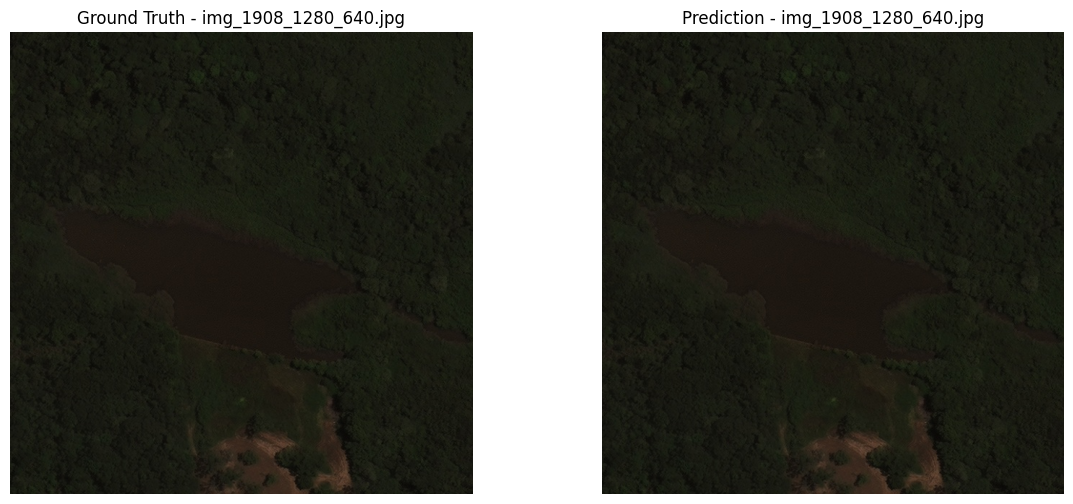


image 1/1 /content/xview/test/img_158_0_2560.jpg: 640x640 15 Buildings, 9.0ms
Speed: 2.3ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


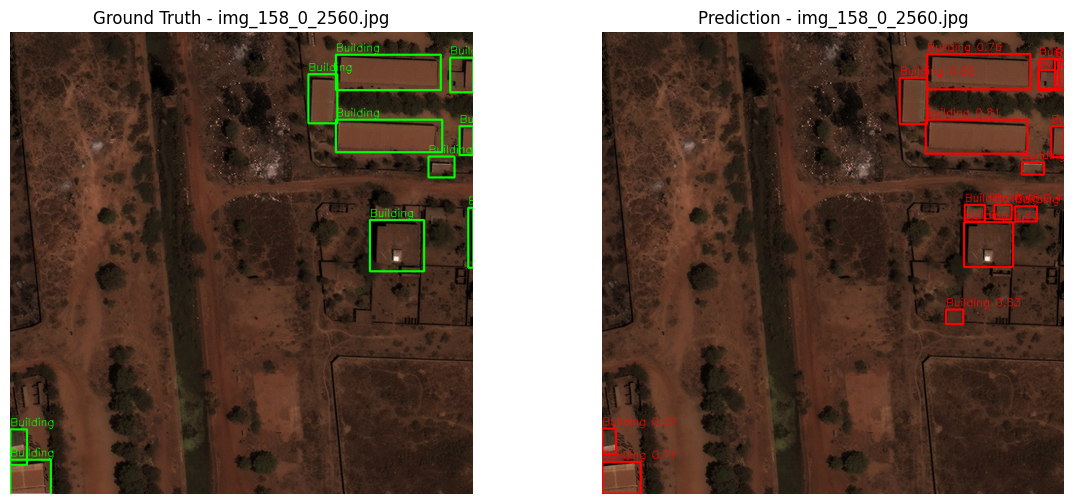


image 1/1 /content/xview/test/img_1690_1920_2560.jpg: 640x640 58 Small Cars, 26 Buildings, 9.5ms
Speed: 2.3ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


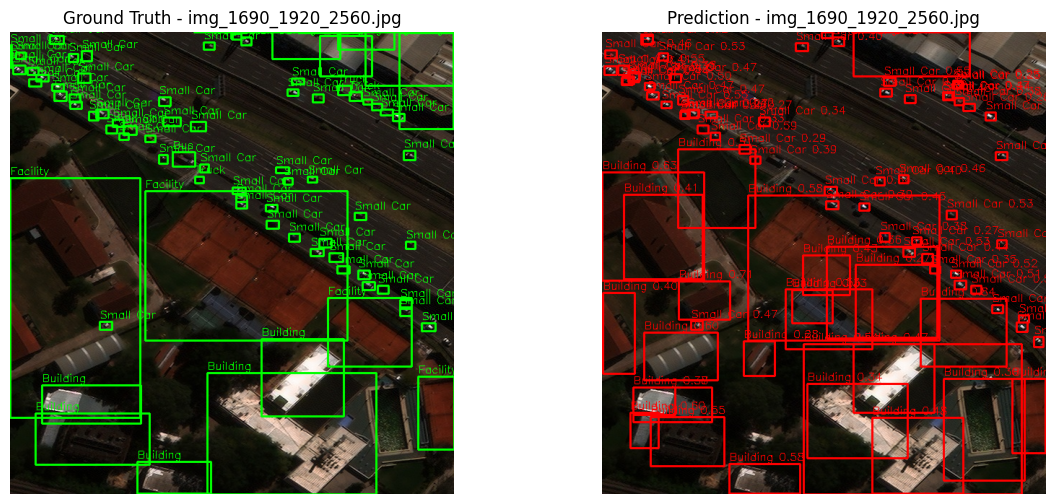

In [ ]:
# Ground truth vs prediction comparison
test_dir = yaml_dict["path"] + "/test"
all_images = [f for f in os.listdir(test_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
selected_images = random.sample(all_images, 3)

for img_name in selected_images:
    img_path = f"{test_dir}/{img_name}"
    label_path = f"{test_dir}/{img_name.rsplit('.', 1)[0]}.txt"

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img_rgb.shape

    gt_img = img_rgb.copy()
    pred_img = img_rgb.copy()

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()
        for line in lines:
            cls, cx, cy, bw, bh = map(float, line.split())
            x1 = int((cx - bw/2) * w)
            y1 = int((cy - bh/2) * h)
            x2 = int((cx + bw/2) * w)
            y2 = int((cy + bh/2) * h)
            cls_name = yaml_dict["names"].get(int(cls), str(int(cls)))
            cv2.rectangle(gt_img, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(gt_img, cls_name, (x1, max(0,y1-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

    result = model_val.predict(source=img_path, imgsz=640, conf=0.25)
    for r in result:
        boxes = r.boxes
        for conf, cls, xyxy in zip(boxes.conf, boxes.cls, boxes.xyxy):
            x1, y1, x2, y2 = map(int, xyxy)
            cls_name = yaml_dict["names"].get(int(cls), str(int(cls)))
            cv2.rectangle(pred_img, (x1, y1), (x2, y2), (255,0,0), 2)
            cv2.putText(pred_img, f"{cls_name} {conf:.2f}", (x1, max(0,y1-5)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.imshow(gt_img)
    plt.title(f"Ground Truth - {img_name}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(pred_img)
    plt.title(f"Prediction - {img_name}")
    plt.axis('off')

    plt.show()

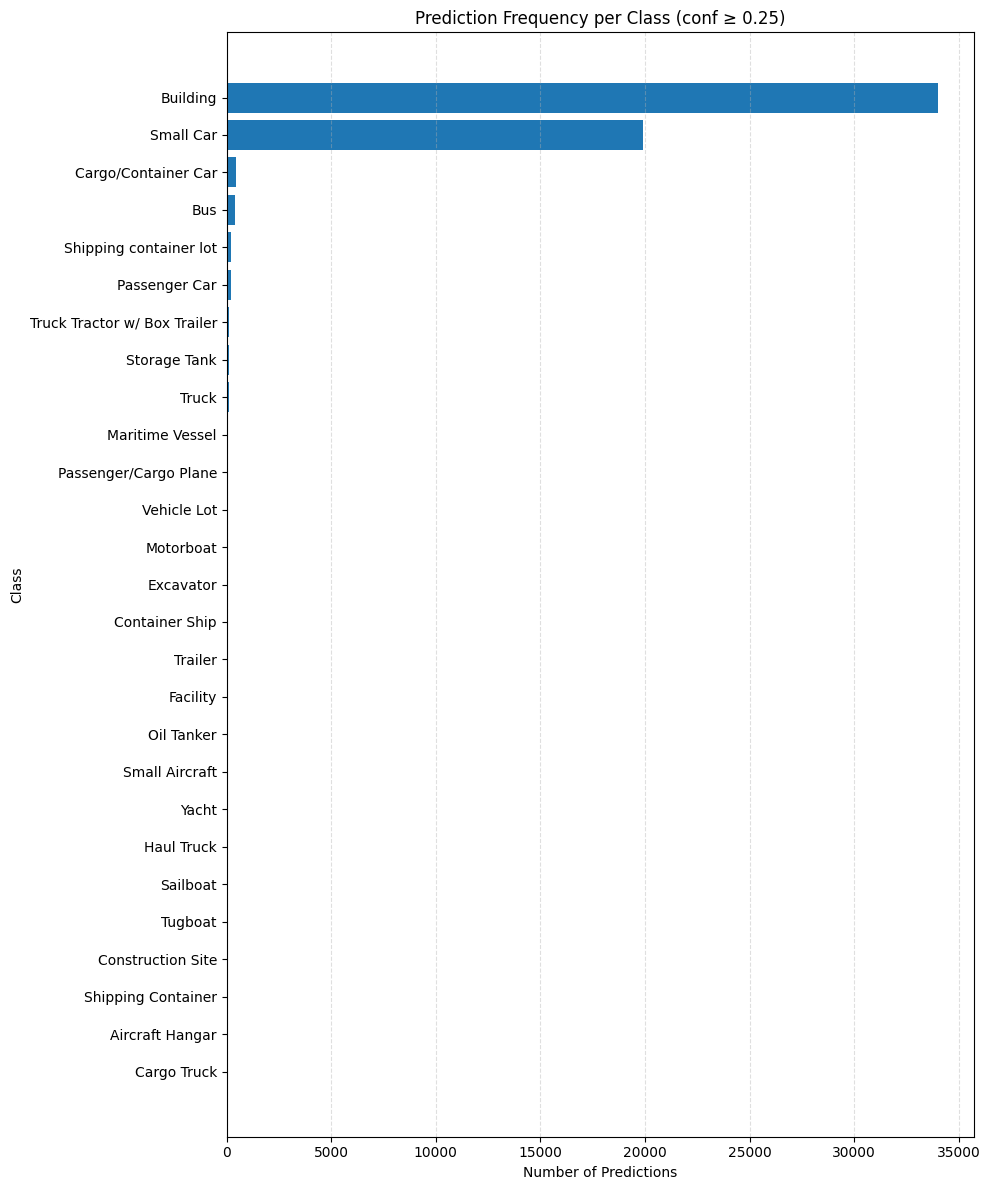

Prediction Frequency Summary
Total predictions: 55758
Number of detected classes: 27
Average predictions per class: 2065.1
Prediction frequency per class (count and percentage):
Building                         34015  ( 61.00%)
Small Car                        19883  ( 35.66%)
Cargo/Container Car                426  (  0.76%)
Bus                                399  (  0.72%)
Shipping container lot             195  (  0.35%)
Passenger Car                      184  (  0.33%)
Truck Tractor w/ Box Trailer       111  (  0.20%)
Storage Tank                       104  (  0.19%)
Truck                               98  (  0.18%)
Maritime Vessel                     87  (  0.16%)
Passenger/Cargo Plane               66  (  0.12%)
Vehicle Lot                         56  (  0.10%)
Motorboat                           56  (  0.10%)
Excavator                           26  (  0.05%)
Container Ship                      15  (  0.03%)
Trailer                             12  (  0.02%)
Facility              

In [ ]:
# Prediction frequency per class
class_counts = conf_df.groupby('class').size().reset_index(name='count')
class_counts['Class'] = class_counts['class'].map(
    lambda x: yaml_dict["names"].get(x, str(x))
)
class_counts = class_counts.sort_values('count', ascending=False)

total_preds = class_counts['count'].sum()
class_counts['percentage'] = (class_counts['count'] / total_preds) * 100

class_counts_plot = class_counts.sort_values('count', ascending=True)

plt.figure(figsize=(10, 12))
plt.barh(class_counts_plot['Class'], class_counts_plot['count'])
plt.xlabel('Number of Predictions')
plt.ylabel('Class')
plt.title('Prediction Frequency per Class (conf ≥ 0.25)')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

print("Prediction Frequency Summary")
print(f"Total predictions: {total_preds}")
print(f"Number of detected classes: {len(class_counts)}")
print(f"Average predictions per class: {class_counts['count'].mean():.1f}")

print("Prediction frequency per class (count and percentage):")
for _, row in class_counts.iterrows():
    print(f"{row['Class']:<30} {row['count']:>7}  ({row['percentage']:>6.2f}%)")

imbalance_ratio = class_counts.iloc[0]['count'] / class_counts.iloc[-1]['count']
print(f"Class imbalance ratio (max/min): {imbalance_ratio:.1f}")


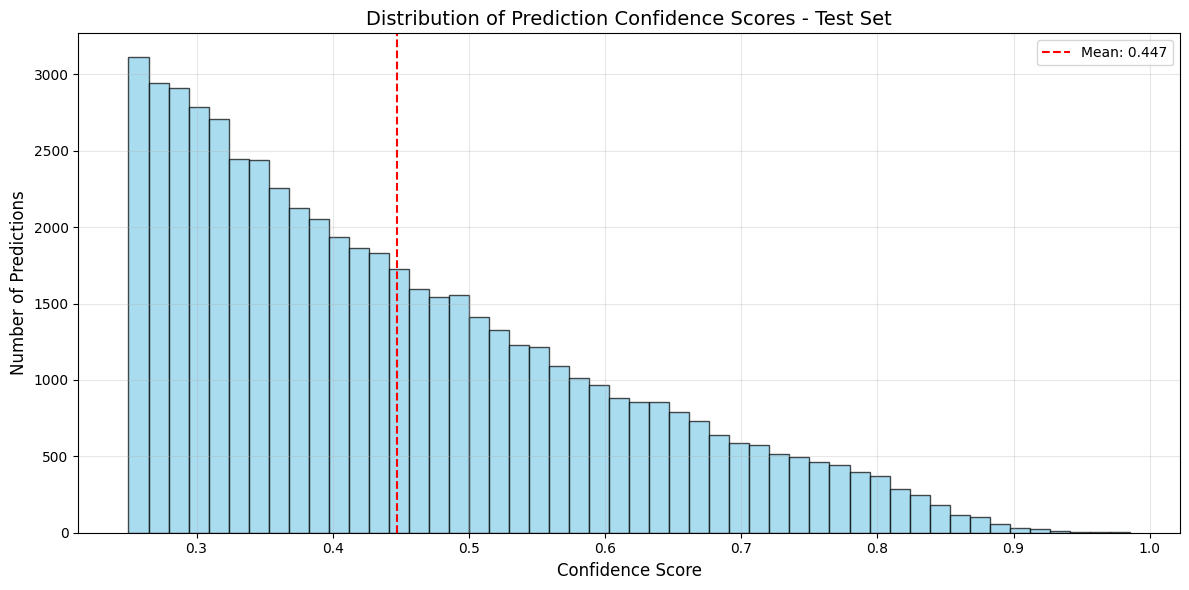


High vs Low Confidence Predictions
High confidence (>0.5): 17915 (32.1%)
Low confidence (≤0.5): 37843 (67.9%)

Top 10 classes with high confidence:
  Building: 12893
  Small Car: 4442
  Cargo/Container Car: 181
  Passenger Car: 114
  Bus: 70
  Storage Tank: 56
  Passenger/Cargo Plane: 49
  Shipping container lot: 49
  Maritime Vessel: 24
  Truck Tractor w/ Box Trailer: 9


In [ ]:
# Confidence distribution histogram
plt.figure(figsize=(12,6))
plt.hist(conf_df['confidence'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Confidence Score', fontsize=12)
plt.ylabel('Number of Predictions', fontsize=12)
plt.title('Distribution of Prediction Confidence Scores - Test Set', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axvline(conf_df['confidence'].mean(), color='red', linestyle='--',
            label=f"Mean: {conf_df['confidence'].mean():.3f}")
plt.legend()
plt.tight_layout()
plt.show()

# High vs low confidence split
high_conf = conf_df[conf_df['confidence'] > 0.5]
low_conf  = conf_df[conf_df['confidence'] <= 0.5]

print("\nHigh vs Low Confidence Predictions")
print(f"High confidence (>0.5): {len(high_conf)} ({len(high_conf)/len(conf_df)*100:.1f}%)")
print(f"Low confidence (≤0.5): {len(low_conf)} ({len(low_conf)/len(conf_df)*100:.1f}%)")

high_conf_classes = high_conf.groupby('class').size().sort_values(ascending=False).head(10)
print("\nTop 10 classes with high confidence:")
for cls_id, count in high_conf_classes.items():
    cls_name = yaml_dict['names'].get(cls_id, str(cls_id))
    print(f"  {cls_name}: {count}")

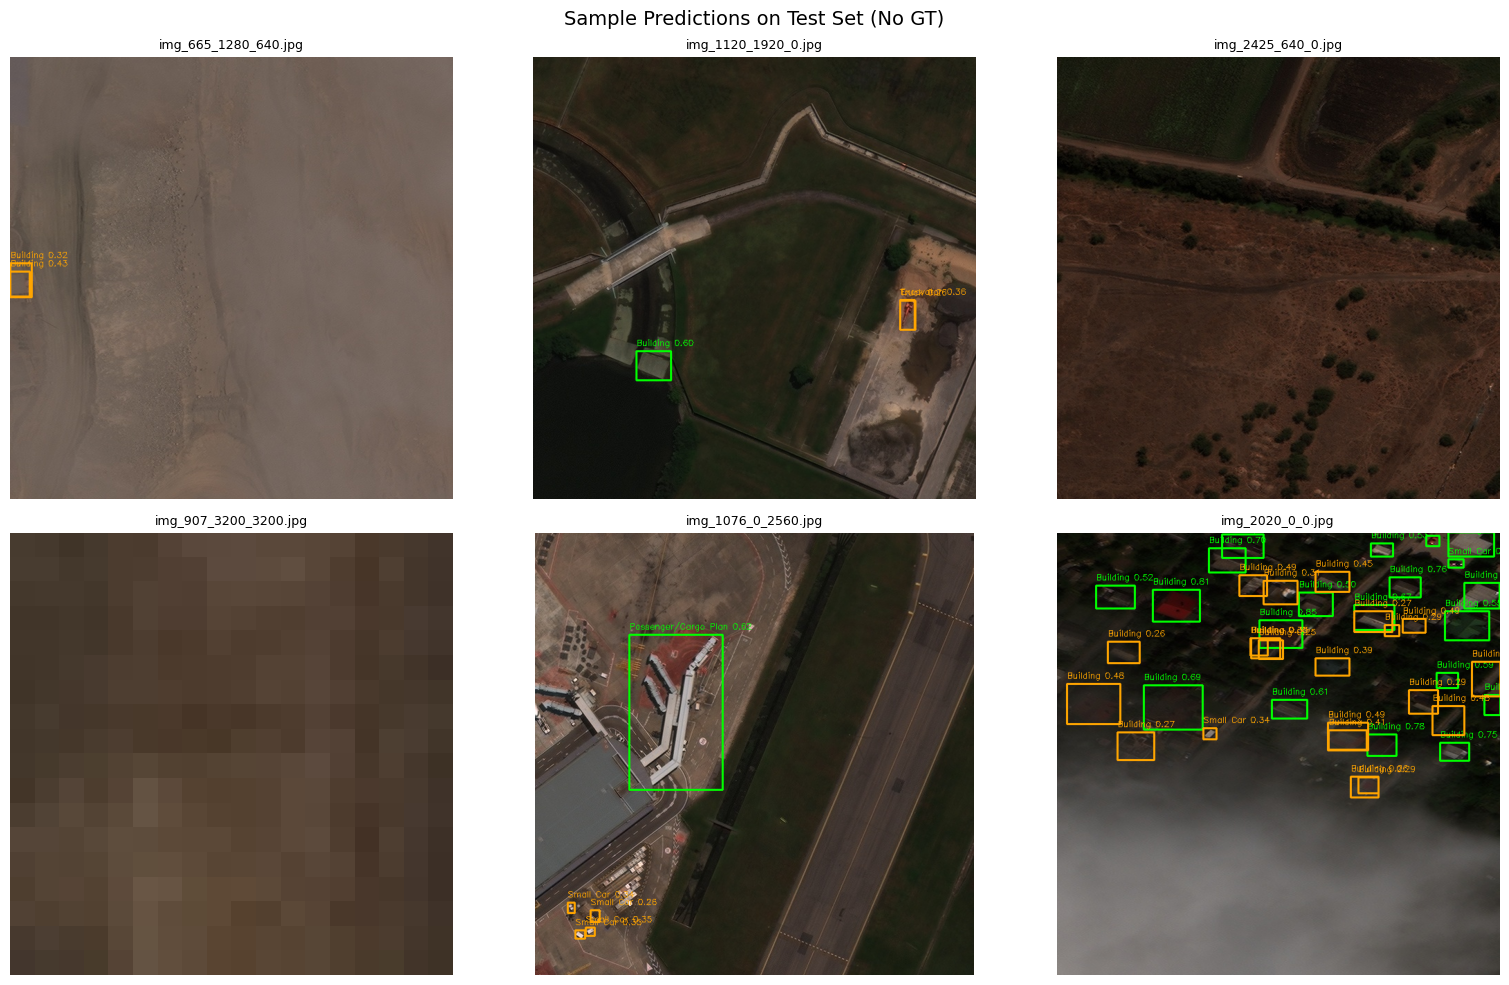

In [ ]:
# Sample predictions visualization
test_imgs = [f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
selected_imgs = random.sample(test_imgs, min(6, len(test_imgs)))

fig, axes = plt.subplots(2, 3, figsize=(16,10))
axes = axes.flatten()

for idx, img_name in enumerate(selected_imgs):
    img_path = os.path.join(test_dir, img_name)
    result = model_val.predict(source=img_path, imgsz=640, conf=0.25, verbose=False)[0]

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for box, cls, conf in zip(result.boxes.xyxy, result.boxes.cls, result.boxes.conf):
        x1, y1, x2, y2 = map(int, box.cpu().numpy())
        class_name = yaml_dict["names"][int(cls)]
        color = (0,255,0) if conf > 0.5 else (255,165,0)
        cv2.rectangle(img, (x1,y1), (x2,y2), color, 2)
        cv2.putText(img, f"{class_name[:20]} {conf:.2f}", (x1, max(0,y1-8)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)

    axes[idx].imshow(img)
    axes[idx].set_title(img_name, fontsize=9)
    axes[idx].axis('off')

for idx in range(len(selected_imgs), 6):
    axes[idx].axis('off')

plt.suptitle("Sample Predictions on Test Set (No GT)", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
# Download and extract Google Earth demo images
earth_id = "1muj9iYR06EyadnbHdG0LjgAe3I-RR_bY"
earth_zip_path = "/content/earth.zip"
earth_folder = "/content/google_earth_demo"

gdown.download(f"https://drive.google.com/uc?id={earth_id}", earth_zip_path, quiet=False)

os.makedirs(earth_folder, exist_ok=True)

with zipfile.ZipFile(earth_zip_path, 'r') as zip_ref:
    for f in zip_ref.namelist():
        if f.startswith("earth/") and f.lower().endswith(('.jpg', '.jpeg', '.png')):
            zip_ref.extract(f, "/content/")
            extracted_path = os.path.join("/content", f)
            target_path = os.path.join(earth_folder, os.path.basename(f))
            os.rename(extracted_path, target_path)

earth_images = [f for f in os.listdir(earth_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(f"Images extracted in {earth_folder}: {len(earth_images)} found")
print(earth_images)


Downloading...
From: https://drive.google.com/uc?id=1muj9iYR06EyadnbHdG0LjgAe3I-RR_bY
To: /content/earth.zip
100%|██████████| 3.72M/3.72M [00:00<00:00, 20.9MB/s]


Images extracted in /content/google_earth_demo: 6 found
['1.jpg', '2.jpg', '6.jpg', '4.jpg', '3.jpg', '5.jpg']


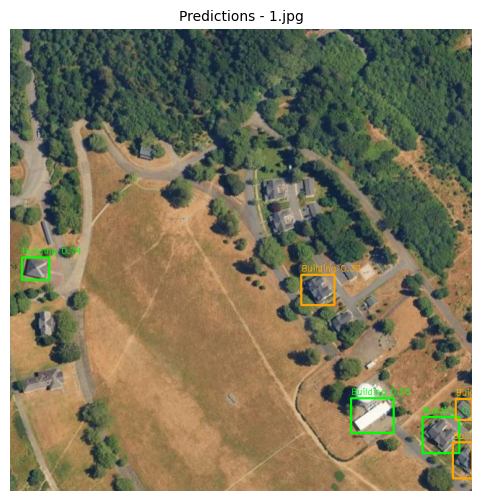

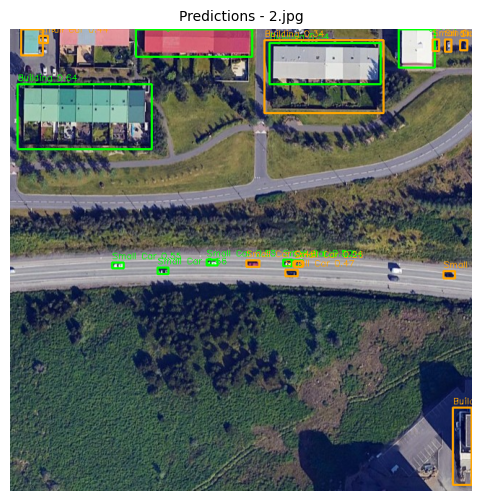

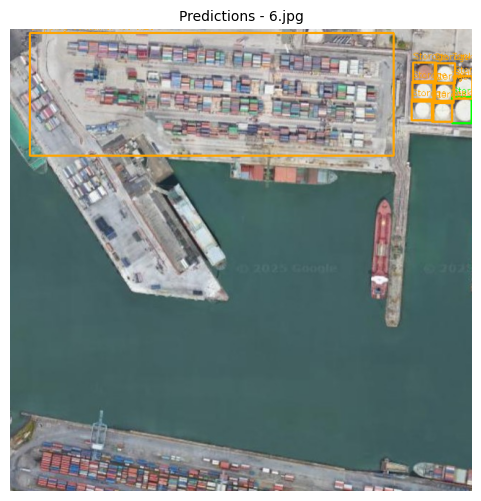

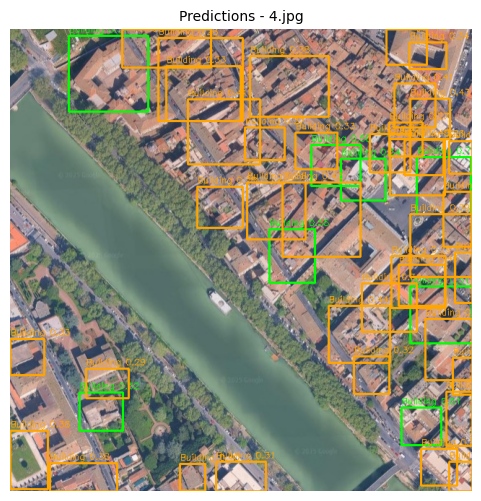

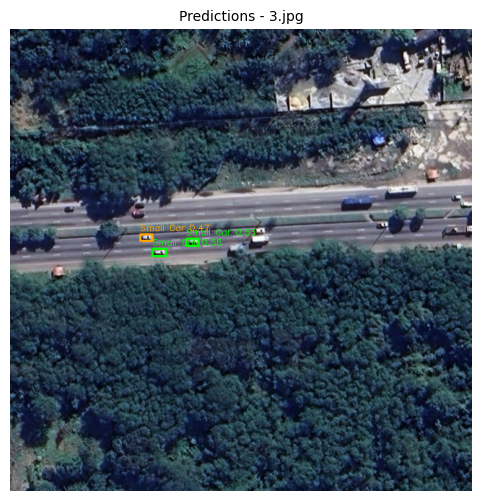

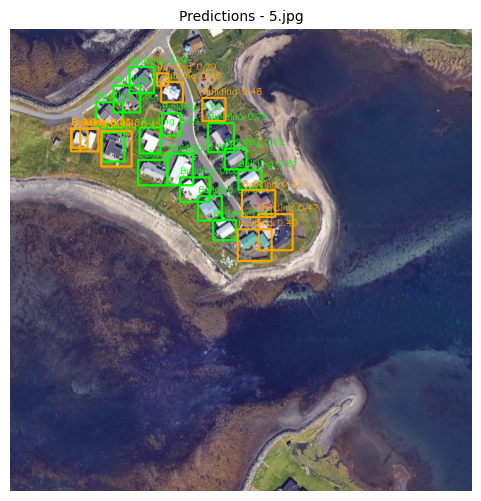

In [ ]:
# Inference on Google Earth images
def center_crop(img, size=640):
    h, w = img.shape[:2]
    start_x = max((w - size) // 2, 0)
    start_y = max((h - size) // 2, 0)
    cropped = img[start_y:start_y+size, start_x:start_x+size]
    if cropped.shape[0] != size or cropped.shape[1] != size:
        cropped = cv2.resize(cropped, (size, size))
    return cropped

earth_images = [f for f in os.listdir(earth_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in earth_images:
    img_path = os.path.join(earth_folder, img_name)
    img = cv2.imread(img_path)

    if img is None:
        print(f"Could not read {img_name}")
        continue

    img_cropped = center_crop(img, 640)
    img_rgb = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB)
    results = model_val.predict(source=img_cropped, imgsz=640, conf=0.25, verbose=False)

    for r in results:
        for conf, cls, xyxy in zip(r.boxes.conf, r.boxes.cls, r.boxes.xyxy):
            x1, y1, x2, y2 = map(int, xyxy)
            cls_name = yaml_dict["names"].get(int(cls), str(int(cls)))
            color = (0,255,0) if conf > 0.5 else (255,165,0)
            cv2.rectangle(img_rgb, (x1,y1), (x2,y2), color, 2)
            cv2.putText(img_rgb, f"{cls_name} {conf:.2f}", (x1, max(0,y1-5)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)

    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.title(f"Predictions - {img_name}", fontsize=10)
    plt.axis('off')
    plt.show()